In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')

import tensorflow as tf

import sys
sys.path.append('../')

from MRIsegm.metrics import dice_coef
from segmentation_models.losses import DiceLoss, BinaryFocalLoss
from MRIsegm.datagenerators import DataGenerator
from MRIsegm.graphics import show_dataset

## Segmentation

In [27]:
model_name = 'efficientnetb0_BTC=4_full_150E_OPT=adam_LOSS=dice_loss_plus_1binary_focal_loss'


models_dir = '../data/models'


weights_dir = '../data/models/weights'
model_architecture = weights_dir + '/' + model_name + '.json'
model_weights = weights_dir + '/' + model_name + '_weights.h5'

import json
from tensorflow.keras.models import model_from_json

with open(model_architecture) as json_file:
    data = json.load(json_file)

model = model_from_json(data)
model.load_weights(model_weights)

optimizer = 'adam'

dice_loss = DiceLoss()
focal_loss = BinaryFocalLoss()
loss = dice_loss + (1 * focal_loss)

metrics = [dice_coef]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [28]:
BACKBONE = 'efficientnetb0'

SEED = 666
BATCH = 4


IMAGE_HEIGHT = 512
IMAGE_WIDTH =  512
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)


source_path = '../data/imgs_extra'
label_path = '../data/labels_extra'

In [29]:
train_generator = DataGenerator(batch_size=BATCH, 
                                source_path=source_path, 
                                label_path=label_path,
                                seed=SEED, aug=True,
                                validation_split=0.2, subset='training'
                               )
validation_generator = DataGenerator(batch_size=BATCH, 
                                     source_path=source_path, 
                                     label_path=label_path,
                                     seed=SEED, aug=False,
                                     validation_split=0.2, subset='validation'
                                    )

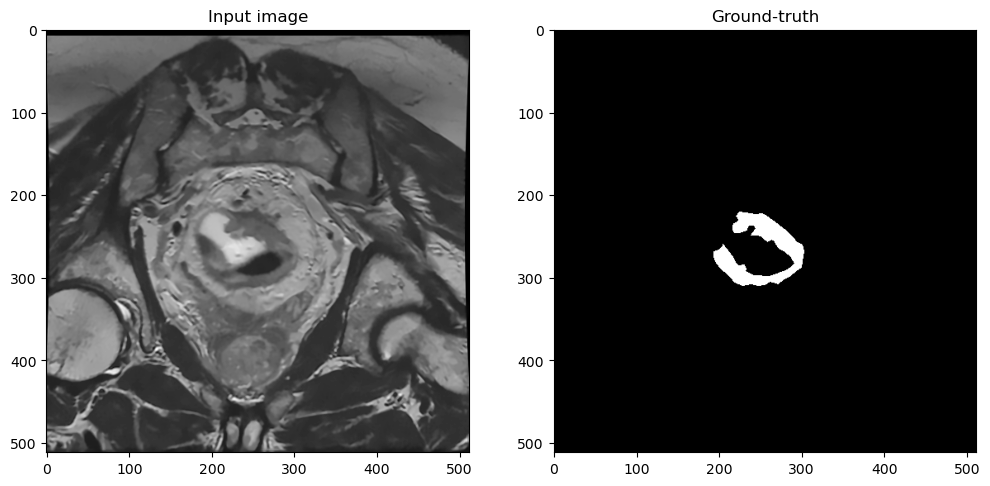

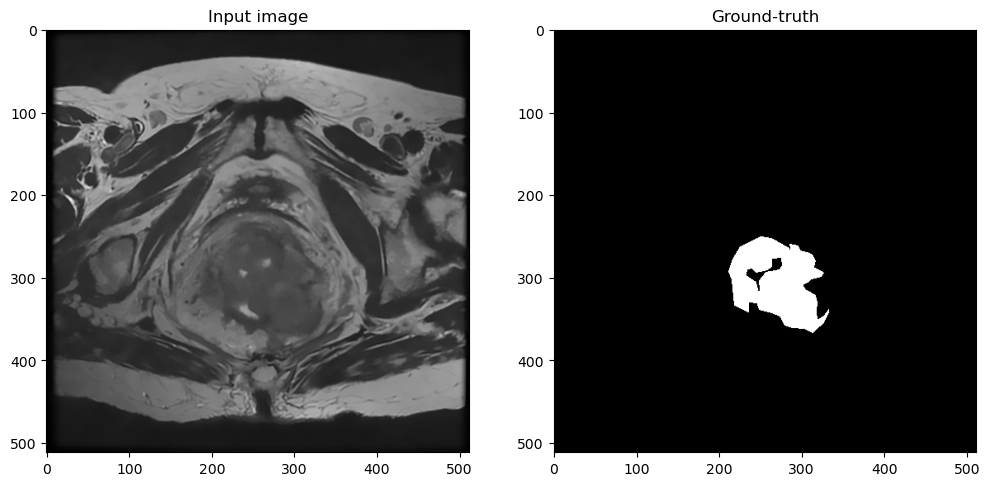

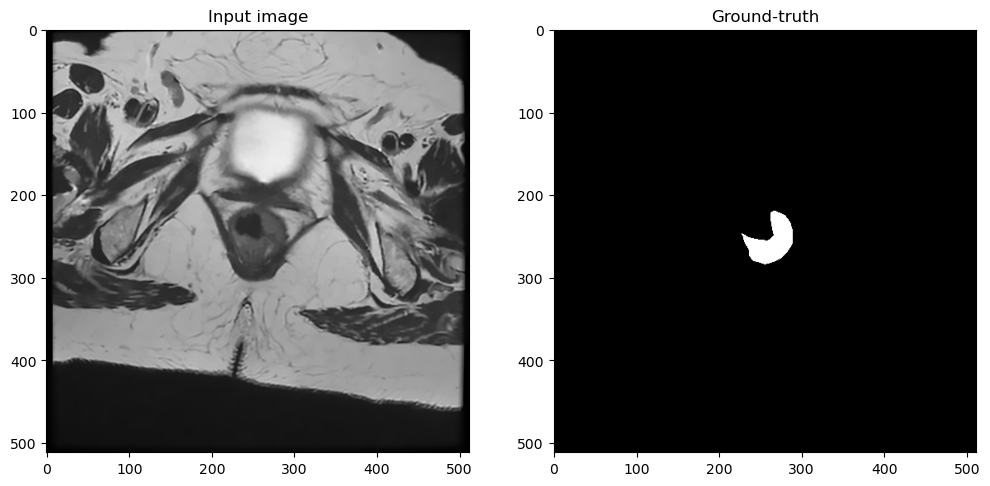

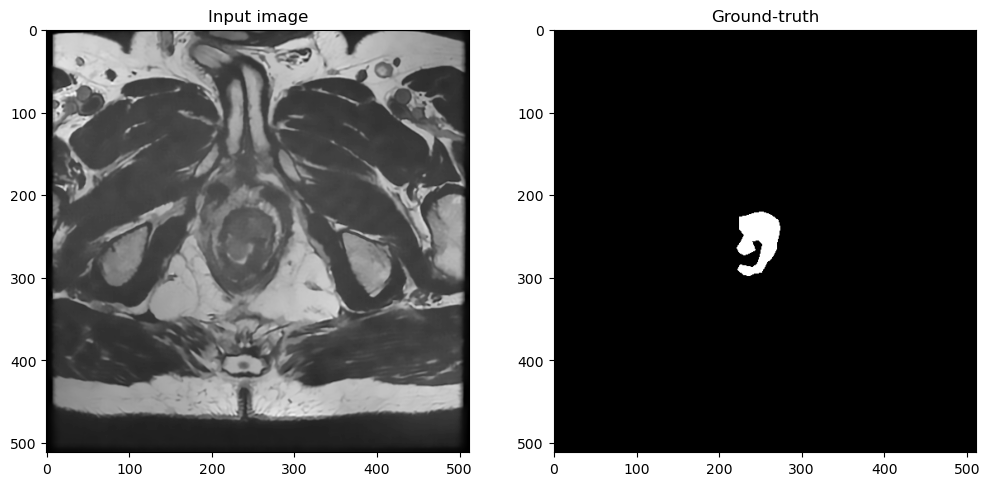

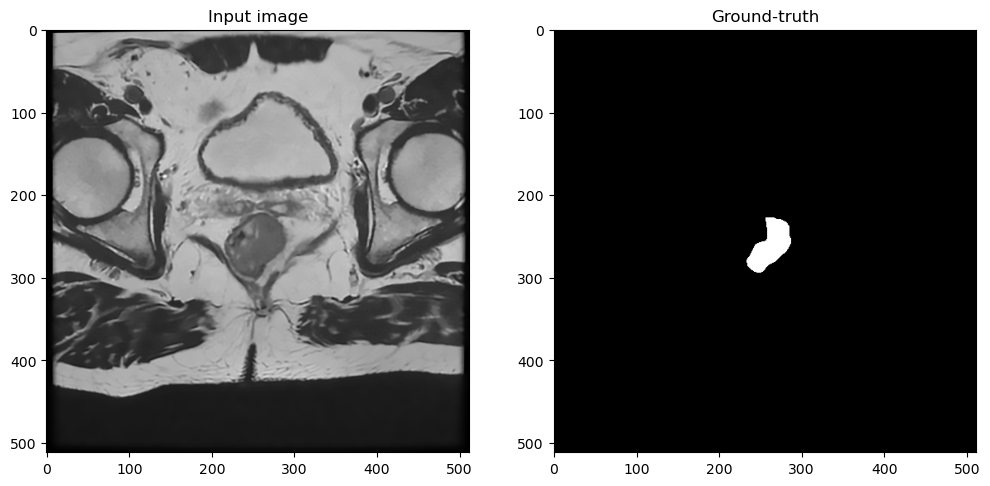

In [30]:
show_dataset(validation_generator, 5)

In [31]:
print(f"Evaluating on validation data ({validation_generator._num_data} images)")
evaluation = model.evaluate(validation_generator, batch_size=BATCH, steps=validation_generator._num_data // BATCH, return_dict=True)
print(evaluation)

Evaluating on validation data (115 images)
28/28 [==============================] - 24s 829ms/step - loss: 0.2205 - dice_coef: 0.7401
{'loss': 0.2205200344324112, 'dice_coef': 0.7401072382926941}


In [32]:
evals = []

for i in range(20 + 1):
    evaluation = model.evaluate(validation_generator, batch_size=BATCH, steps=validation_generator._num_data // BATCH, return_dict=True)
    evals.append(evaluation)

28/28 [==============================] - 23s 837ms/step - loss: 0.2288 - dice_coef: 0.7482


In [33]:
losses = []
dices = []
for i,_ in enumerate(evals):
    losses.append(evals[i]['loss'])
    dices.append(evals[i]['dice_coef'])

In [34]:
mean_loss = np.array(losses).mean()
std_loss = np.array(losses).std()

mean_dice = np.array(dices).mean()
std_dice = np.array(dices).std()

In [35]:
from tabulate import tabulate

print( tabulate({'Dice score': ["{:.2f}".format(mean_dice) + ' ' + u"\u00B1" + ' ' + "{:.3f}".format(std_dice)], 'loss': ["{:.2f}".format(mean_loss) + ' ' + u"\u00B1" + ' ' + "{:.2f}".format(std_loss)]}, headers='keys', tablefmt="github"))

| Dice score   | loss        |
|--------------|-------------|
| 0.74 ± 0.005 | 0.23 ± 0.01 |


## TRG

In [36]:
#new data
# df = pd.read_csv('../data/features/'  + 'feature_extra_csv', delimiter=',', index_col=0)

#old data
df = pd.read_csv('../data/features/'  + 'features_csv', delimiter=',', index_col=0)

In [37]:
df

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,TRG
BO1,429.0,798.0,1.336950e+09,4.536893,192.00,4.809975,1370.0,589.569839,120.627757,557.0,...,45.099889,57.140179,58.008620,3550.416667,35.631913,0.358332,3140.879027,0.884651,3594.0,2.0
BO2,237.0,390.0,1.990333e+09,3.402873,75.00,5.854507,723.0,311.722498,49.870963,306.0,...,139.014388,145.784087,161.198635,19389.291667,80.246340,0.171401,20363.155899,1.050227,19553.0,2.0
BO11,154.0,293.0,2.823765e+09,3.169558,65.00,7.140266,744.0,217.377486,44.028965,208.0,...,94.047860,101.237345,110.154437,55595.208333,81.328868,0.247490,28463.243811,0.511973,55512.0,3.0
BO16,138.0,244.0,3.483271e+08,2.764315,55.00,3.543087,399.0,187.399852,32.846181,182.0,...,90.022219,96.462428,97.411498,9376.083333,51.375241,0.262210,8200.670904,0.874637,9451.0,0.0
BO26,191.0,303.0,1.007257e+10,2.917379,57.00,4.066159,610.0,247.838891,35.250953,247.0,...,138.014492,144.069428,145.196419,158485.625000,110.110423,0.248722,56941.572313,0.359285,158607.0,2.0
BO29,223.0,417.0,1.859944e+09,3.613234,109.00,2.597569,580.0,317.326669,61.116935,314.0,...,95.634722,82.462113,99.362971,17205.916667,63.084556,0.159622,20191.865984,1.173542,17507.0,1.0
BO31,493.0,1068.0,1.014975e+10,5.202772,309.00,4.431866,2467.0,783.858711,181.529800,780.0,...,117.004273,117.153745,118.156676,15058.708333,55.602673,0.238019,12389.802684,0.822767,15217.0,2.0
BO32,415.0,735.0,1.043870e+10,4.382560,149.00,6.035520,1618.0,567.493021,101.604343,548.0,...,81.154174,99.904955,109.096288,30467.666667,66.116600,0.236993,19905.534047,0.653333,30591.0,2.0
BO33,225.0,402.0,3.945180e+09,3.543471,91.00,4.824233,929.0,310.724375,55.974704,305.0,...,139.032370,127.000000,142.804062,38187.541667,63.492129,0.188507,29091.849949,0.761815,38741.0,3.0
BO35,139.0,238.0,2.049103e+08,2.720582,52.25,3.784450,353.0,185.792519,31.583666,182.0,...,95.084173,73.061618,102.893148,5554.166667,53.849598,0.193861,7823.574994,1.408596,5668.0,3.0


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef


X = df.drop('TRG', axis=1)
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

In [39]:
pipeline = make_pipeline(StandardScaler(), PCA(n_components=.9, svd_solver='full'), SVC(C=100, probability=True, random_state=0))

In [40]:
from sklearn.metrics import classification_report

n_splits = 10

M_coeffs = []

Class_reports = []

for i in range(500):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i + 1)
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    MCC = matthews_corrcoef(y, y_pred)
    M_coeffs.append(MCC)

    target_names = ['Class 0', 'Class 1']
    Class_reports.append(classification_report(y, y_pred, target_names=target_names, output_dict=True))

In [41]:
def split_class_reports(Class_reports):
    """ Split Class report for class 0 and class 1 """
    Class_0_report = []
    Class_1_report = []

    for i, _ in enumerate(Class_reports): 
        Class_0_report.append(Class_reports[i]['Class 0'])
        Class_1_report.append(Class_reports[i]['Class 1'])

    return Class_0_report, Class_1_report

In [42]:
def generate_report(Class_reports):
    """ Generate precision, recall and f1-score report for class 0 and class 1"""
    Class_0_report, Class_1_report = split_class_reports(Class_reports)
    precisions_0 = []
    recalls_0 = []
    f1s_0 = []

    for i, _ in enumerate(Class_0_report):
        precisions_0.append(Class_0_report[i]['precision'])
        recalls_0.append(Class_0_report[i]['recall'])
        f1s_0.append(Class_0_report[i]['f1-score'])

    precisions_1 = []
    recalls_1 = []
    f1s_1 = []

    for i, _ in enumerate(Class_1_report):
        precisions_1.append(Class_1_report[i]['precision'])
        recalls_1.append(Class_1_report[i]['recall'])
        f1s_1.append(Class_1_report[i]['f1-score'])


    precisions_0_arr = np.array(precisions_0)
    recalls_0_arr = np.array(recalls_0)
    f1s_0_arr = np.array(f1s_0)

    precisions_1_arr = np.array(precisions_1)
    recalls_1_arr = np.array(recalls_1)
    f1s_1_arr = np.array(f1s_1)

    precision_0_mean = precisions_0_arr.mean()
    precision_1_mean = precisions_1_arr.mean()

    precision_0_std = precisions_0_arr.std()
    precision_1_std = precisions_1_arr.std()

    recall_0_mean = recalls_0_arr.mean()
    recall_1_mean = recalls_1_arr.mean()

    recall_0_std = recalls_0_arr.std()
    recall_1_std = recalls_1_arr.std()

    f1_0_mean = f1s_0_arr.mean()
    f1_1_mean = f1s_1_arr.mean()

    f1_0_std = f1s_0_arr.std()
    f1_1_std = f1s_1_arr.std()

    
    d = {'Class': ['Class 0', 'Class 1'], 'precision': ['{:.2f}'.format(precision_0_mean) + ' ' + u"\u00B1" + ' ' + '{:.2f}'.format(precision_0_std) , '{:.2f}'.format(precision_1_mean) + ' ' + u"\u00B1" + ' ' + '{:.2f}'.format(precision_1_std)], 'recall': ['{:.2f}'.format(recall_0_mean) + ' ' + u"\u00B1" + ' ' + '{:.2f}'.format(recall_0_std), '{:.2f}'.format(recall_1_mean) + ' ' + u"\u00B1" + ' ' + '{:.2f}'.format(recall_1_std)], 'f1-score': ['{:.2f}'.format(f1_0_mean) + ' ' + u"\u00B1" + ' ' + '{:.2f}'.format(f1_0_std), '{:.2f}'.format(f1_1_mean) + ' ' + u"\u00B1" + ' ' + '{:.2f}'.format(f1_1_std)] }
    
    return d

In [43]:
from tabulate import tabulate

print(tabulate(generate_report(Class_reports),headers='keys', tablefmt="github"))



| Class   | precision   | recall      | f1-score    |
|---------|-------------|-------------|-------------|
| Class 0 | 0.70 ± 0.05 | 0.79 ± 0.07 | 0.74 ± 0.05 |
| Class 1 | 0.84 ± 0.05 | 0.77 ± 0.05 | 0.80 ± 0.04 |


In [44]:
M_coeffs_arr = np.array(M_coeffs)

M_coeffs_mean = M_coeffs_arr.mean()
M_coeffs_std = M_coeffs_arr.std()

print( tabulate({'MCC': ["{:.2f}".format(M_coeffs_mean) + ' ' + u"\u00B1" + ' ' + "{:.2f}".format(M_coeffs_std)]}, headers='keys', tablefmt="github"))

| MCC         |
|-------------|
| 0.55 ± 0.09 |


In [45]:
data = M_coeffs
median = np.argsort(data)[len(data)//2]
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=median + 1)
y_pred = cross_val_predict(pipeline, X, y, cv=skf)


Text(0.5, 427.9555555555555, 'Predicted label')

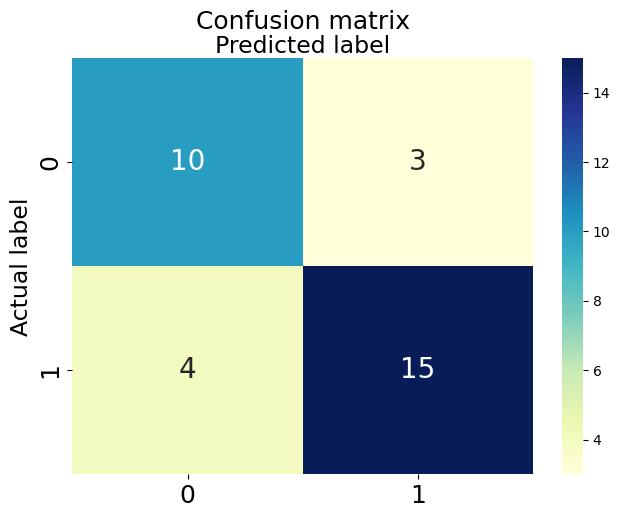

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

class_names=[0, 1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, fontsize=18)
plt.yticks(tick_marks, class_names, fontsize=18)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', annot_kws={"fontsize":20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.05, fontsize=18)
plt.ylabel('Actual label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)

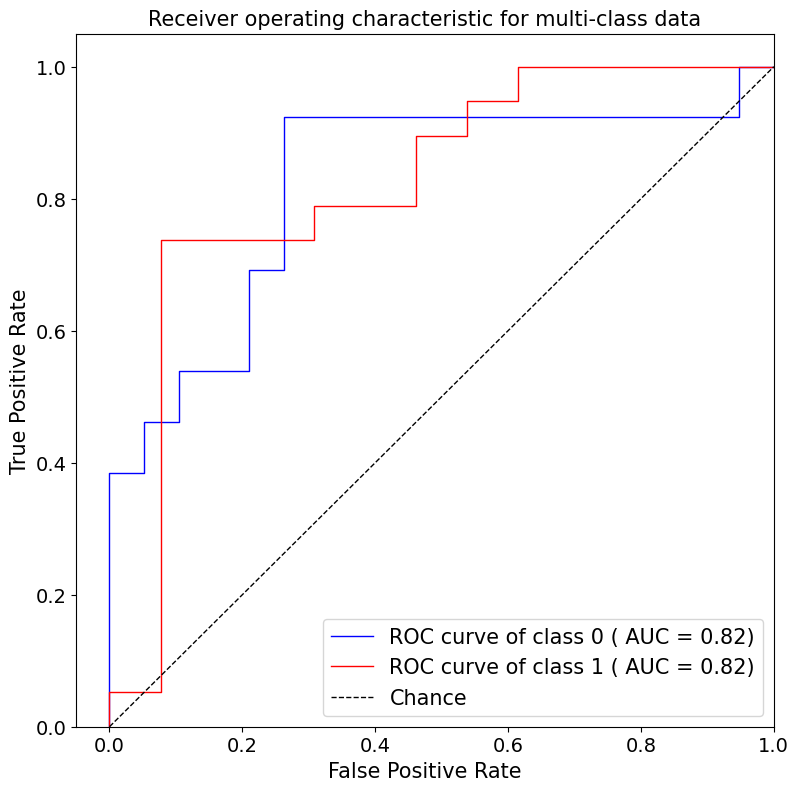

In [47]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_curve, auc



X = df.drop('TRG', axis=1).values
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

lw = 1
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])[:,:-1]
n_classes = y_bin.shape[1]

y_score = cross_val_predict(pipeline, X, y, cv=skf ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(9, 9))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} ( AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))



plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver operating characteristic for multi-class data',fontsize=15)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='black',
         label='Chance', )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="lower right", fontsize=15)
plt.show()

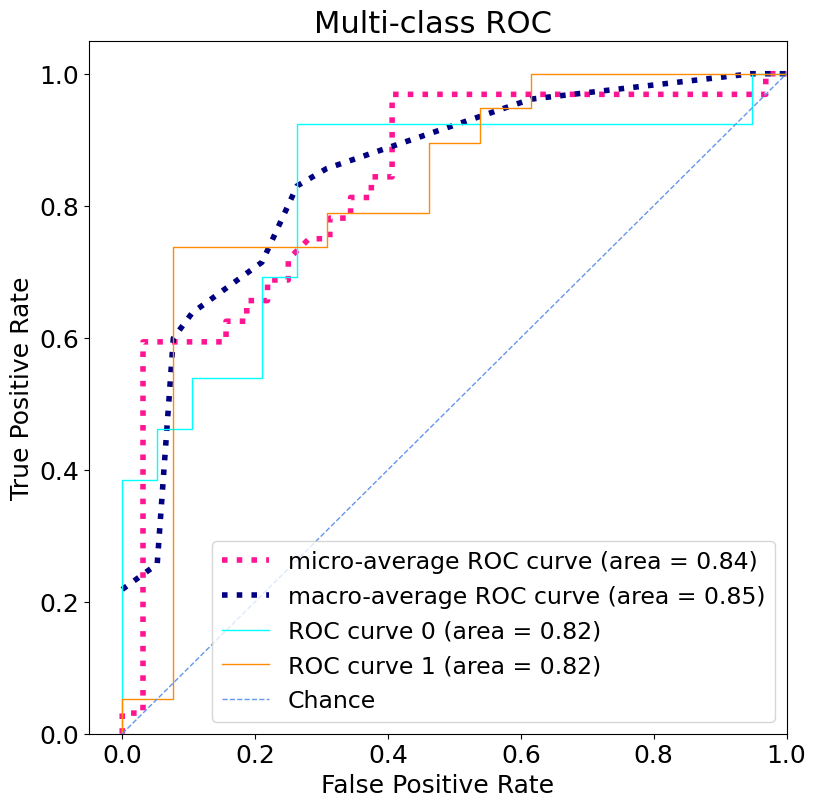

In [48]:
from numpy import interp
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize


X = df.drop('TRG', axis=1).values
y = df['TRG'].values
y = np.where(y <=1, 0, 1)

lw = 1
# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])[:,:-1]
n_classes = y_bin.shape[1]

y_score = cross_val_predict(pipeline, X, y, cv=skf ,method='predict_proba')

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(9, 9))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='cornflowerblue',
         label='Chance')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Multi-class ROC ', fontsize=22)
plt.legend(loc="lower right", fontsize=17)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()